In [2]:
import numpy as np
import pandas as pd
import PIL
import matplotlib as plt
import math
from PIL import Image
import cv2
cv2.__version__

'4.1.2'

In [0]:
im1 = Image.open('1.gif','r')
im2 = Image.open('2.gif','r')
im3 = Image.open('3.gif','r')
im4 = Image.open('4.gif','r')

In [88]:
rivercrd = [172,153,161,164,176,108,185,233,218,293,210,287,219,338,208,356,212,342,200,370,194,406,167,471,175,460,182,437,188,407,163,477,162,477,172,466,164,171,191,230,205,269,220,297,188,431,174,461,162,496,166,465,154,499,176,459,216,306,212,353,219,321,195,266,195,385,185,246,174,111,166,46,169,147,200,272,219,323,217,300,175,458,159,491,185,250,162,40,181,90,161,143,217,304,162,479,152,495,162,476]
non_rivercrd = [442,164,438,187,440,208,434,242,432,275,396,336,392,351,435,199,403,290,416,373,99,311,58,386,140,336,150,339,121,350,47,255,47,351,78,305,48,190,110,264,71,235,115,260,69,399,40,276,95,343,40,190,92,277,156,350,89,313,91,404,36,288,86,386,108,403,40,353,112,364,21,425,90,274,55,225,91,280,395,402,393,215,391,353,467,261,432,143,360,184,401,140,334,194,391,284,405,282,334,181,372,145,394,195,401,203,347,99,428,334,277,358,356,50,384,125,343,329,414,147,351,411,354,334,509,261,398,45,90,181,95,282,105,282,108,227,105,274,95,283,92,296,76,342,64,320,68,406,56,349,21,293,65,326,69,302,65,385,418,326,456,232,426,177,420,206,413,216,501,23,503,24,503,256,498,234,470,232,387,297,422,124,397,221,409,189,398,224,342,343,456,447,394,497,432,447,453,446,10,32]
print(len(rivercrd),len(non_rivercrd))

100 200


In [0]:
rvr_x = []
rvr_y = []
nrvr_x = []
nrvr_y = []
j = 0
for i in rivercrd:
    if(j%2 == 0):
        rvr_x.append(i)
        
    else:
        rvr_y.append(i)
    j = j + 1
j = 0
for i in non_rivercrd:
    if(j%2 == 0):
        nrvr_x.append(i)
        
    else:
        nrvr_y.append(i)
    j = j + 1

In [0]:
# print(len(rvr_x),len(rvr_y),len(nrvr_x),len(nrvr_x))

In [0]:
px1 = im1.load()
px2 = im2.load()
px3 = im3.load()
px4 = im4.load()
px_list = []
for i in range(512):
  for j in range(512):
    px_list.append([px1[i,j], px2[i,j],px3[i,j],px4[i,j]])
px_data = np.array(px_list)
# print(px_data.shape)
mean = np.sum(px_data, axis = 0)/len(px_list)

In [0]:
cov_mat = np.matmul((px_data[:,0:4]-mean).T, (px_data[:,0:4]-mean))/len(px_list)
eig_val,eig_vec = np.linalg.eig(cov_mat)
dim = 4
pcs = 4
eig_vec = eig_vec[:,range(pcs)]
px = np.matmul(px_data-mean, eig_vec)

data = []
ndata = []
i = 0
while i<len(rvr_x):
    data.append(px[rvr_x[i]*512+rvr_y[i], :])
    i = i +1
i = 0
while i < len(nrvr_x):
  ndata.append(px[nrvr_x[i]*512+nrvr_y[i],:])
  i = i+1
# print(ndata1)

In [93]:
data = np.array(data)
ndata = np.array(ndata)

7


In [102]:
mean = np.sum(data, axis = 0)/len(data)
nmean = np.sum(ndata, axis = 0)/len(ndata)
print(mean)
print(nmean)

[ -8.2540888  -10.54384567   1.33180746   0.31144439]
[ 1.61176084  1.79202829 -0.09945188 -0.14607215]


In [0]:
# print(mean1,mean2,mean3,mean4)
# print(nmean1,nmean2,nmean3,nmean4)
cov1 = np.matmul((data[:, 0:pcs]-mean).T, data[:, 0:pcs]-mean)/len(data)
cov2 = np.matmul((ndata[:, 0:pcs]-nmean).T, ndata[:, 0:pcs]-nmean)/len(ndata)
cv1det = np.linalg.det(cov1.reshape(pcs,pcs))
cv1in = np.linalg.inv(cov1.reshape(pcs,pcs))
cv2det = np.linalg.det(cov2.reshape(pcs,pcs))
cv2in = np.linalg.inv(cov2.reshape(pcs,pcs))
P1 = 0.3
P2 = 0.7

In [0]:
out = []
k = 0
for i in range(len(px)):
  l1 = np.asarray(px[i,0:pcs] -mean)
  l2 = np.asarray(px[i,0:pcs] -nmean)
  riverclass = np.matmul(np.matmul(l1,cv1in),l1.T)
  nonriverclass = np.matmul(np.matmul(l2,cv2in),l2.T)
  try:
    p1 = (-0.5)/math.sqrt(cv1det)*math.exp(riverclass)
    p2 = (-0.5)/math.sqrt(cv2det)*math.exp(nonriverclass)
    if(p1*P1 >= p2*P2):
      out.append(255)
    else:
      out.append(0)
  except:
      k=k+1
      out.append(0)

In [0]:
out = np.asarray(out,dtype = np.uint8).reshape(512,512).T
result = Image.fromarray(out)

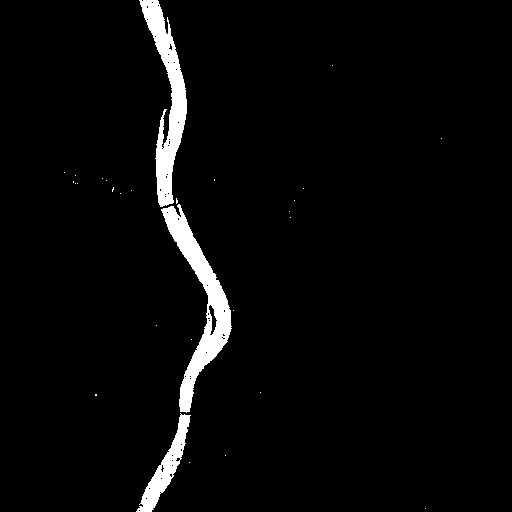

In [106]:
result.save('result.png')
display(result)
#result.imshow()